In [1]:
import meep as mp
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Using MPI version 4.0, 1 processes


In [2]:
data = pd.read_csv("MMIOutput.csv")

frequencies = data['Frequency'].tolist()
incident_mode_alpha = data['StraightAlpha'].tolist()
input_low_alpha = data['InputLoAlpha'].tolist()
output_low_alpha = data['OutputLoAlpha'].tolist()
output_high_alpha = data['OutputHiAlpha'].tolist()
transmission_low = data['Low Transmission'].tolist()
transmission_high = data['High Transmission'].tolist()
reflection_low = data['Low Refl'].tolist()
reflection_high = data['High Refl'].tolist()
phase_low = data['Low Phase'].tolist()
phase_high = data['High Phase'].tolist()


/home/ebang4/miniconda3/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ebang4/miniconda3/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


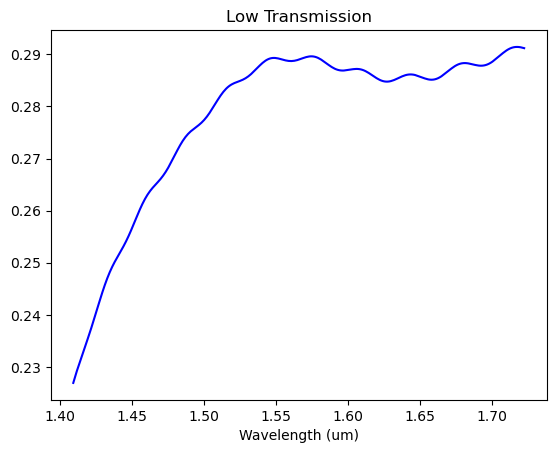

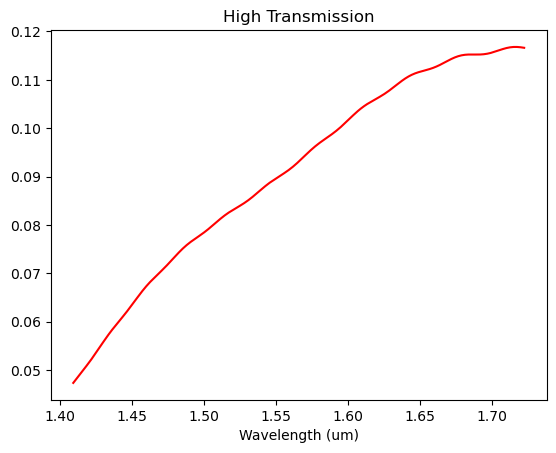

In [3]:
wvls= np.zeros(len(frequencies))
for i in range(len(frequencies)):
    wvls[i] = 1/frequencies[i]

fig, ax = plt.subplots()
ax.plot(wvls[:], transmission_low, color='blue')
ax.set_xlabel('Wavelength (um)')
ax.set_title('Low Transmission')
plt.show()
#fig.savefig("TransmissionLow.png")

fig, ax = plt.subplots()
ax.plot(wvls[:], transmission_high, color='red')
ax.set_xlabel('Wavelength (um)')
ax.set_title('High Transmission')
#fig.savefig("TransmissionHigh.png")
plt.show()

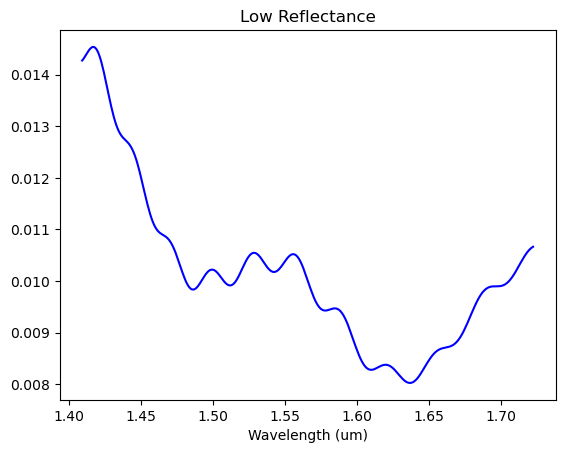

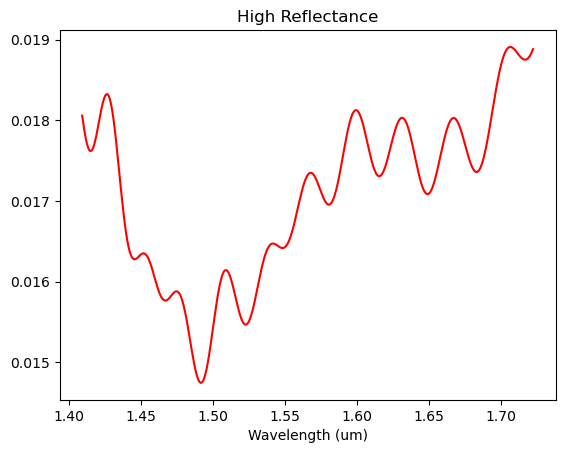

In [4]:
# Plotting the reflectance
fig, ax = plt.subplots()
ax.plot(wvls[:], reflection_low, color='blue')
ax.set_xlabel('Wavelength (um)')
ax.set_title('Low Reflectance')
plt.show()
#fig.savefig("ReflectanceLow.png")

fig, ax = plt.subplots()
ax.plot(wvls[:], reflection_high, color='red')
ax.set_xlabel('Wavelength (um)')
ax.set_title('High Reflectance')
plt.show()
#fig.savefig("ReflectanceHigh.png")

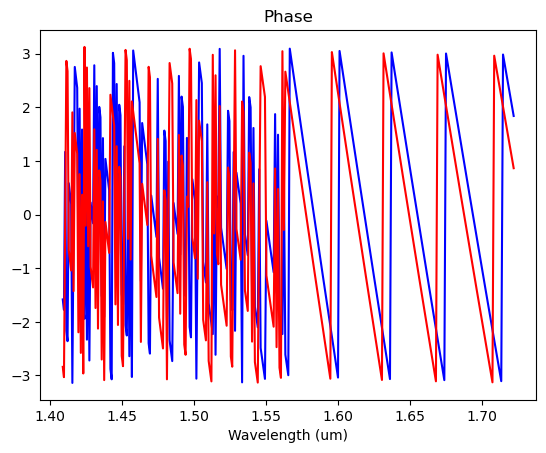

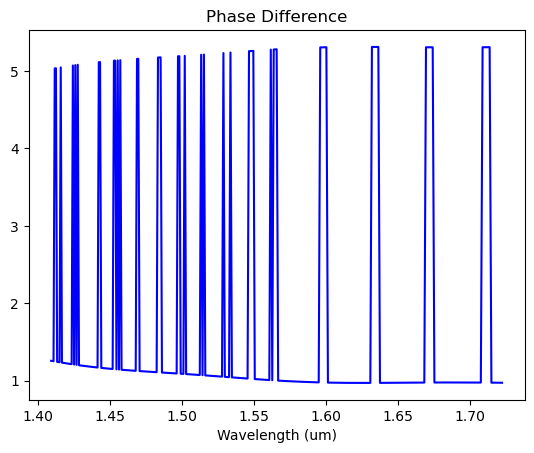

In [5]:
# Plot the phase
fig, ax = plt.subplots()
ax.plot(wvls[:], phase_low, color='blue')
ax.plot(wvls[:], phase_high, color='red')
ax.set_xlabel('Wavelength (um)')
ax.set_title('Phase')
plt.show()
#fig.savefig("Phase.png")

# Plot the phase difference
phase_difference = np.zeros(len(phase_low))
for i in range(len(phase_low)):
    phase_difference[i] = np.abs(phase_low[i] - phase_high[i])
fig, ax = plt.subplots()
ax.plot(wvls[:], phase_difference, color='blue')
ax.set_xlabel('Wavelength (um)')
ax.set_title('Phase Difference')
plt.show()
#fig.savefig("PhaseDifference.png")

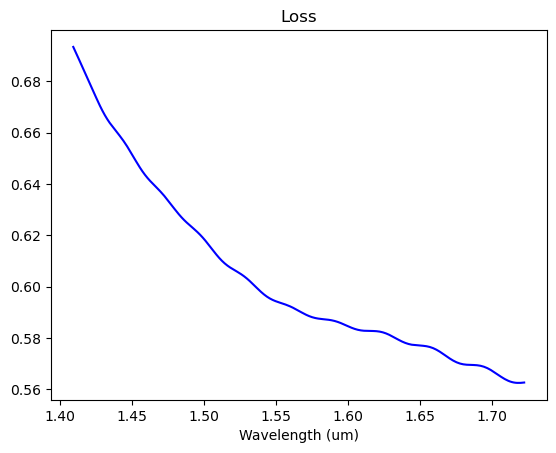

In [6]:
# Calculate loss
loss = np.zeros(len(transmission_high))
for i in range(len(transmission_high)):
    loss[i] = 1 - transmission_high[i] - transmission_low[i]- reflection_high[i] - reflection_low[i]
fig, ax = plt.subplots()
ax.plot(wvls[:], loss, color='blue')
ax.set_xlabel('Wavelength (um)')
ax.set_title('Loss')
plt.show()
#fig.savefig("Phase.png")